### Notebook used to extract important Features to assist with making user input easier.
### We Ultimately used another approach and this was not used

In [1]:
from sklearn import tree, preprocessing
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
beer_csv = pd.read_csv("beerlist_w_Kmean.csv")

In [3]:
beer_raw_csv = pd.read_csv("/Users/eamonnmccallum/Monash-DS/groupwork/pp/PredictivePandas/PredictivePandas/data/final_beerdata.csv")
beer_country = beer_raw_csv[["beer_id" , "country"]]

In [4]:
beer_csv_short  = pd.merge(beer_csv, beer_country, on="beer_id", how="left")

In [5]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(beer_csv_short["country"])


LabelEncoder()

In [6]:
#encoded_country = label_encoder.transform(beer_csv_short["country"])
#encoded_country

In [7]:
beer_csv_short["encoded country"] =  label_encoder.transform(beer_csv_short["country"])

In [8]:
beer_csv_short = beer_csv_short.loc[(beer_csv_short["review_overall"] > 3.5)& (beer_csv_short["review_aroma"] > 3.5) &\
                             (beer_csv_short["review_appearance"] > 3.5)& (beer_csv_short["review_palate"] > 3.5)&\
                             (beer_csv_short["review_taste"] > 3.5)]



In [9]:
beer_csv_short.columns

Index(['brewery_id', 'brewery_name', 'beer_id', 'beer_name', 'address',
       'beer_abv', 'numberof_reviews', 'review_overall', 'review_aroma',
       'review_appearance',
       ...
       'country_Trinidad and Tobago', 'country_Turks and Caicos Islands',
       'country_UK', 'country_USA', 'country_USVI', 'country_Ukraine',
       'country_United States', 'Kmeans Cluster', 'country',
       'encoded country'],
      dtype='object', length=284)

In [10]:
y = beer_csv_short["Kmeans Cluster"]

In [12]:
X = beer_csv_short[['encoded country',
'grainy',
 'sweet',
 'hay',
 'straw',
 'cracker',
 'bicuity',
 'caramel',
 'toast',
 'roast',
 'coffee',
 'espresso',
 'burnt',
 'alcohol',
 'tobacco',
 'gunpowder',
 'leather',
 'pine',
 'grass',
 'raisins',
 'currant',
 'plum',
 'dates',
 'prunes',
 'figs',
 'blackberry',
 'blueberry',
 'banana',
 'pineapple',
 'apricot',
 'pear',
 'apple',
 'nectarine',
 'peach',
 'mango',
 'lemon',
 'lime',
 'orange',
 'tangerine',
 'clementine',
 'grapefruit',
 'zest',
 'metallic',
 'vinegar',
 'copper',
 'cidery',
 'astringent',
 'chlorine',
 'phenolic',
 'pepper',
 'clove',
 'anise',
 'licorice',
 'bacon',
 'fatty',
 'nutty',
 'butterscotch',
 'vanilla',
 'earthy',
 'woody',
 'bread',
 'saddle',
 'musty',
 'barnyard',
 'honey',
 'chestnut',
 'black',
 'garnet',
 'ruby',
 'brilliant',
 'hazy',
 'cloudy',
 'turbid',
 'opaque',
 'clear',
 'crystal',
 'bright',
 'dull',
 'persistent',
 'rocky',
 'large',
 'fluffy',
 'dissipating',
 'lingering',
 'white',
 'tan',
 'frothy',
 'delicate',
 'roasted',
 'bready',
 'bitter',
 'spicy',
 'fruity',
 'chocolate',
 'toffee',
 'tart',
 'subtle',
 'woodsy',
 'sulfuric',
 'assertive',
 'mild',
 'bold',
 'balanced',
 'robust',
 'intense',
 'harsh',
 'complex',
 'refined',
 'hearty',
 'smooth',
 'silky',
 'velvety',
 'prickly',
 'tingly',
 'creamy',
 'warming',
 'viscous',
 'oily',
 'Malty',
 'biscuity',
 'breadlike',
 'rich',
 'deep',
 'roasty',
 'cereal',
 'cookie',
 'coffeeish',
 'caramelly',
 'molasses',
 'complexity',
 'smoky',
 'autumnal',
 'cream',
 'milk',
 'oatmeal',
 'rustic',
 'layered',
 'piney',
 'citrusy',
 'grapefruity',
 'sharp',
 'fresh',
 'herbal',
 'zippy',
 'lemony',
 'aromatic',
 'floral',
 'springlike',
 'sprucelike',
 'juniper',
 'minty',
 'pungent',
 'elegant',
 'grassy',
 'baked',
 'bubblegum',
 'yeasty',
 'belgian',
 'tropical',
 'clean',
 'soft',
 'effervescent',
 'spritzy',
 'sparkling',
 'pinpoint',
 'bubbly',
 'gentle',
 'carbonation',
 'full',
 'light',
 'slick',
 'heavy',
 'dry',
 'thick',
 'thin',
 ]]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [14]:
model_1st = RandomForestClassifier(n_estimators = 100, n_jobs=17)

In [15]:
model_1st = model_1st.fit(X_train, y_train)

In [16]:
print(f"F1 Score Train: {model_1st.score(X_train, y_train):.4f}")
print(f"F1 Score Test: {model_1st.score(X_test, y_test):.4f}")

F1 Score Train: 1.0000
F1 Score Test: 0.5397


In [17]:
ft_names = X.columns

In [18]:
import_features = pd.Series(model_1st.feature_importances_, index = ft_names).sort_values(ascending=False)

In [19]:
import_features.head(50)

carbonation    0.047422
light          0.035677
sweet          0.033614
thick          0.020563
thin           0.020379
dry            0.020024
smooth         0.019904
white          0.019840
caramel        0.018264
creamy         0.016528
mild           0.015192
bitter         0.014909
deep           0.014015
bread          0.013897
balanced       0.013692
clear          0.013128
earthy         0.012309
tan            0.011914
full           0.011752
alcohol        0.010986
orange         0.010896
rich           0.010874
heavy          0.010787
fruity         0.010618
subtle         0.009895
hazy           0.009516
lingering      0.009399
fresh          0.009370
complex        0.009171
bready         0.008758
floral         0.008468
toffee         0.008420
spicy          0.008041
cloudy         0.008011
copper         0.007901
clean          0.007827
roasted        0.007774
black          0.007735
soft           0.007713
chocolate      0.007695
herbal         0.007683
pine           0

In [24]:
n_features = []

for i in range(25,80,5):
    n_features.append(i)

# define grid search
param_grid = {'max_features': n_features, 
              'n_estimators': [200, 250, 300, 350,500],
              'max_depth': [20, 25, 30, 35 ,40 ,45]
             }


In [25]:
model = RandomForestClassifier()

In [26]:
grid = GridSearchCV(model, param_grid, n_jobs = -1, verbose = 2)

In [27]:
grid.get_params(deep=True)

{'cv': None,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'iid': 'deprecated',
 'n_jobs': -1,
 'param_grid': {'max_features': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
  'n_estimators': [200, 250, 300, 350, 500],
  'max_depth': [20, 25, 30, 35, 40, 45]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 

In [28]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 330 candidates, totalling 1650 fits


/opt/anaconda3/envs/PythonAdvanced/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 1650 out of 1650 | elapsed: 38.6min finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30, 35, 40, 45],
                         'max_features': [25, 30, 35, 40, 45, 50, 55, 60, 65,
                                          70, 75],
                         'n_estimators': [200, 250, 300, 350, 500]},
             verbose=2)

In [29]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'max_depth': 45, 'max_features': 45, 'n_estimators': 300}
0.5763889375839991
RandomForestClassifier(max_depth=45, max_features=45, n_estimators=300)


In [32]:
model = RandomForestClassifier(max_depth=45, max_features=45, n_estimators=300)

In [33]:
model = model.fit(X_train, y_train)

In [34]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=42)

In [35]:
print(f"F1 Score Test Compared to 1st Sample Set: {model.score(X_test, y_test):.4f}")
print(f"F1 Score Test New Sampled Test Data: {model.score(X_test2, y_test2):.4f}")

F1 Score Test Compared to 1st Sample Set: 0.5381
F1 Score Test New Sampled Test Data: 0.8773


In [36]:
import_features = pd.Series(model.feature_importances_, index = ft_names).sort_values(ascending=False)
import_features = import_features.head(50)


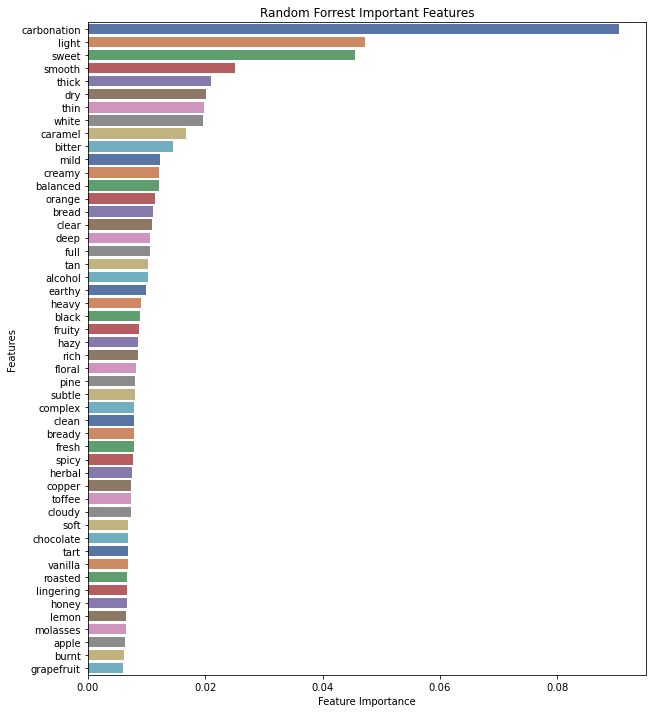

In [37]:
plt.figure(figsize=(10,12))
sns.barplot(x=import_features, y=import_features.index, palette="deep")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title("Random Forrest Important Features")
plt.show()